In [99]:
library(forecast)
library(fpp)
library(smooth)
library(tseries)
library(readxl)

In [100]:
data=read_excel("Datasets/Airlines+Data.xlsx")
head(data)

Month,Passengers
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
1995-06-01,135


In [101]:
data_ts=ts(data$Passengers,start=c(86))

In [102]:
train=data_ts[2:87]
test=data_ts[88:97]

In [103]:
train=ts(train)
test=ts(test)

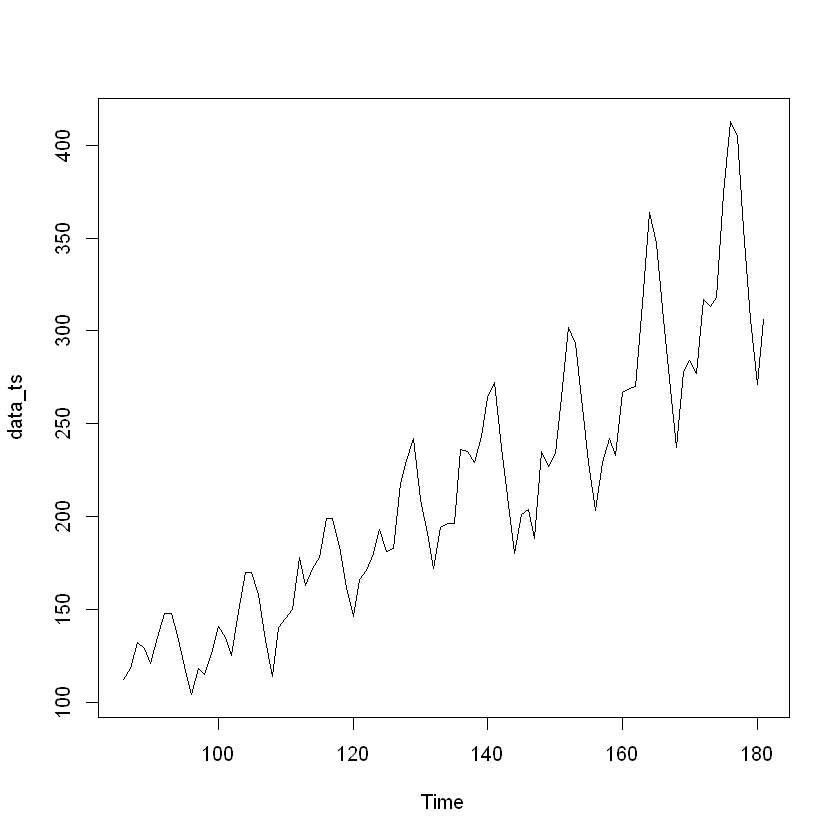

In [104]:
plot(data_ts)

In [105]:
hw_a<-HoltWinters(train,alpha = 0.2,beta = F,gamma = F)
hw_a

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = train, alpha = 0.2, beta = F, gamma = F)

Smoothing parameters:
 alpha: 0.2
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 288.6454

In [106]:
hwa_pred<-data.frame(predict(hw_a,n.ahead=10))

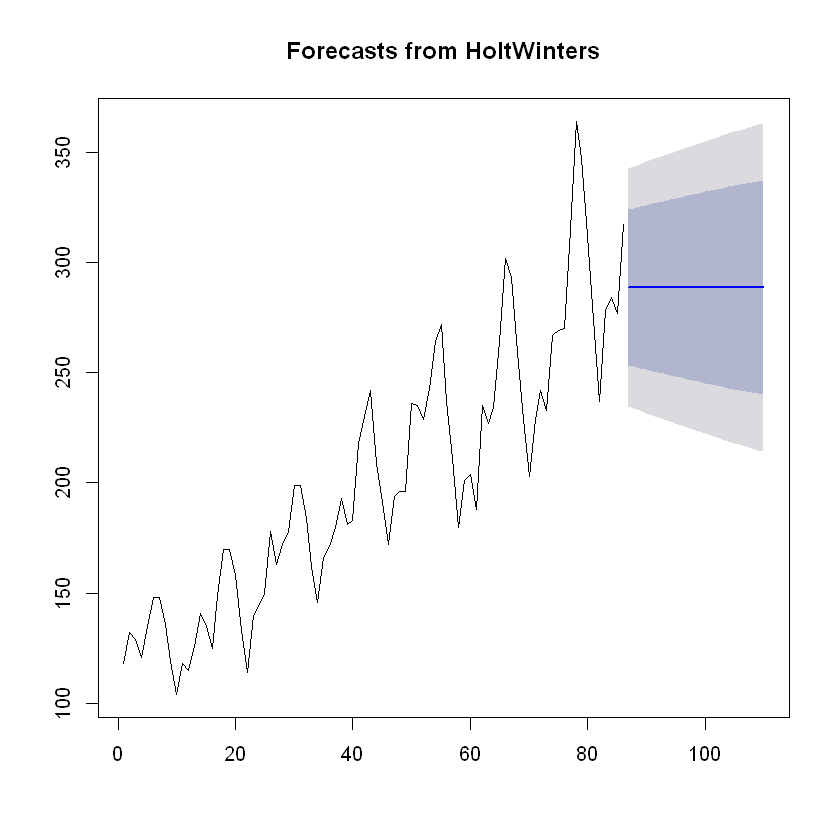

In [107]:
plot(forecast(hw_a,h=24))

In [108]:
hwa_mape<-MAPE(hwa_pred$fit,test)*100
hwa_mape

[1] 19.18858

In [109]:
hw_ab<-HoltWinters(train,alpha = 0.2,beta = 0.1,gamma = F)
hw_ab

Holt-Winters exponential smoothing with trend and without seasonal component.

Call:
HoltWinters(x = train, alpha = 0.2, beta = 0.1, gamma = F)

Smoothing parameters:
 alpha: 0.2
 beta : 0.1
 gamma: FALSE

Coefficients:
        [,1]
a 300.772806
b   2.409459

In [110]:
hwab_pred<-data.frame(predict(hw_ab,n.ahead = 10))

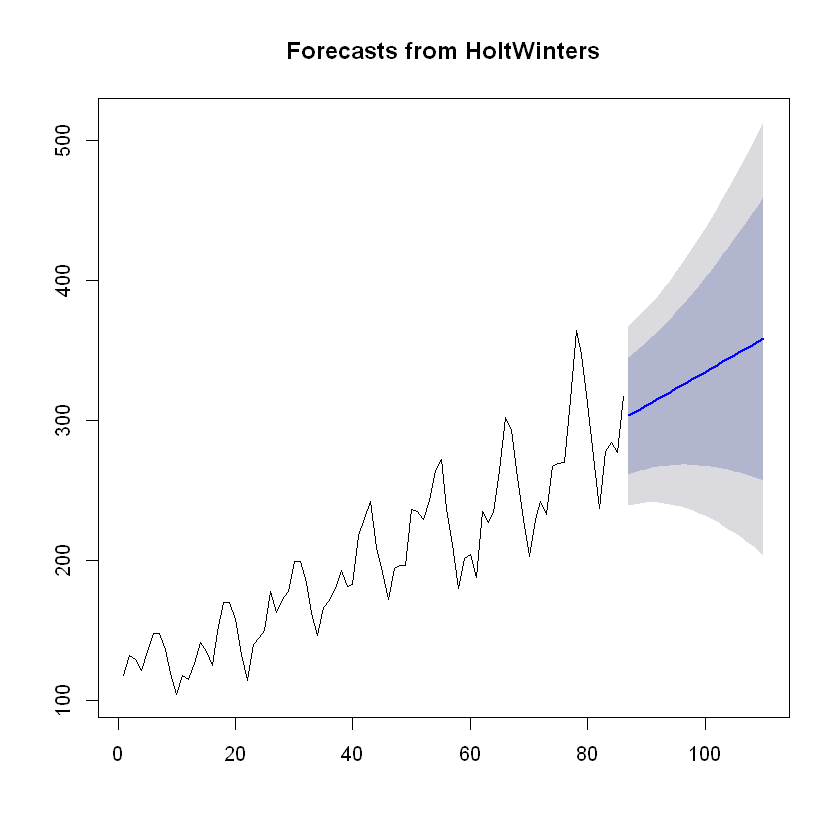

In [111]:
plot(forecast(hw_ab,h=24))

In [112]:
hwab_mape<-MAPE(hwab_pred$fit,test)*100
hwab_mape

[1] 14.21705

In [113]:
hw_na<-HoltWinters(train,beta = F,gamma = F)
hw_na

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = train, beta = F, gamma = F)

Smoothing parameters:
 alpha: 0.9999339
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 316.9974

In [114]:
hwna_pred<-data.frame(predict(hw_na,n.ahead = 10))
hwna_pred

fit
316.9974
316.9974
316.9974
316.9974
316.9974
316.9974
316.9974
316.9974
316.9974
316.9974


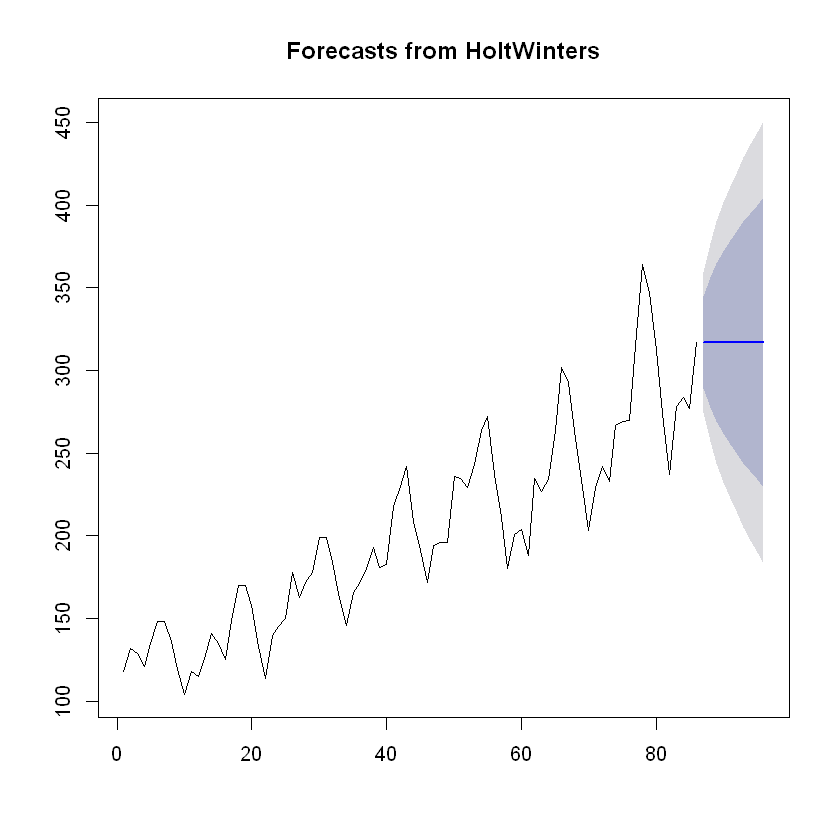

In [115]:
plot(forecast(hw_na,h=10))

In [116]:
hwna_mape<-MAPE(hwna_pred$fit,test)*100
hwna_mape

[1] 12.33809

In [117]:
hw_nab<-HoltWinters(train,gamma=F)
hw_nab

Holt-Winters exponential smoothing with trend and without seasonal component.

Call:
HoltWinters(x = train, gamma = F)

Smoothing parameters:
 alpha: 1
 beta : 0.04355431
 gamma: FALSE

Coefficients:
        [,1]
a 317.000000
b   3.437976

In [118]:
hwnab_pred<-data.frame(predict(hw_nab,n.ahead=10))

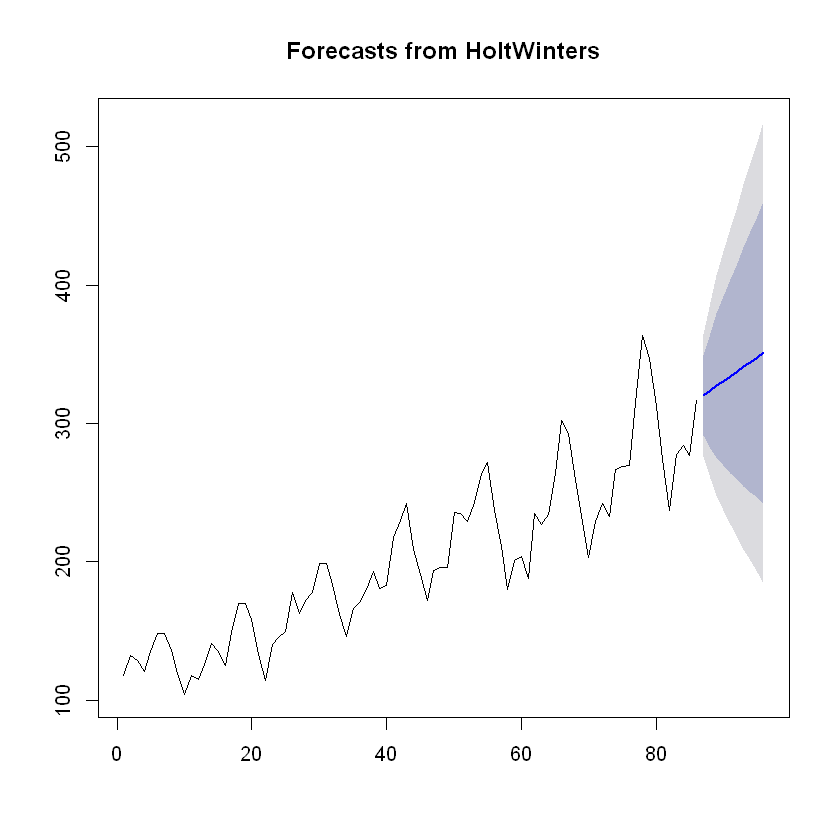

In [119]:
plot(forecast(hw_nab,h=10))

In [120]:
hwnab_mape<-MAPE(hwnab_pred$fit,test)*100
hwnab_mape

[1] 12.58571

In [121]:
df_mape<-data.frame(c("hwa_mape","hwab_mape","hwna_mape","hwnab_mape"),c(hwa_mape,hwab_mape,hwna_mape,hwnab_mape))

In [122]:
df_mape

c..hwa_mape....hwab_mape....hwna_mape....hwnab_mape..,c.hwa_mape..hwab_mape..hwna_mape..hwnab_mape.
hwa_mape,19.18858
hwab_mape,14.21705
hwna_mape,12.33809
hwnab_mape,12.58571


In [123]:
ses_a<-ses(train,alpha = 0.2)
ses_a

   Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
87       288.6454 251.2607 326.0300 231.4705 345.8203
88       288.6454 250.5203 326.7704 230.3382 346.9525
89       288.6454 249.7941 327.4966 229.2275 348.0633
90       288.6454 249.0812 328.2096 228.1371 349.1536
91       288.6454 248.3808 328.9099 227.0661 350.2246
92       288.6454 247.6925 329.5982 226.0134 351.2773
93       288.6454 247.0156 330.2751 224.9781 352.3126
94       288.6454 246.3494 330.9413 223.9593 353.3314
95       288.6454 245.6937 331.5971 222.9564 354.3343
96       288.6454 245.0477 332.2430 221.9685 355.3222

In [124]:
sesa_pred<-data.frame(predict(ses_a,h=10))

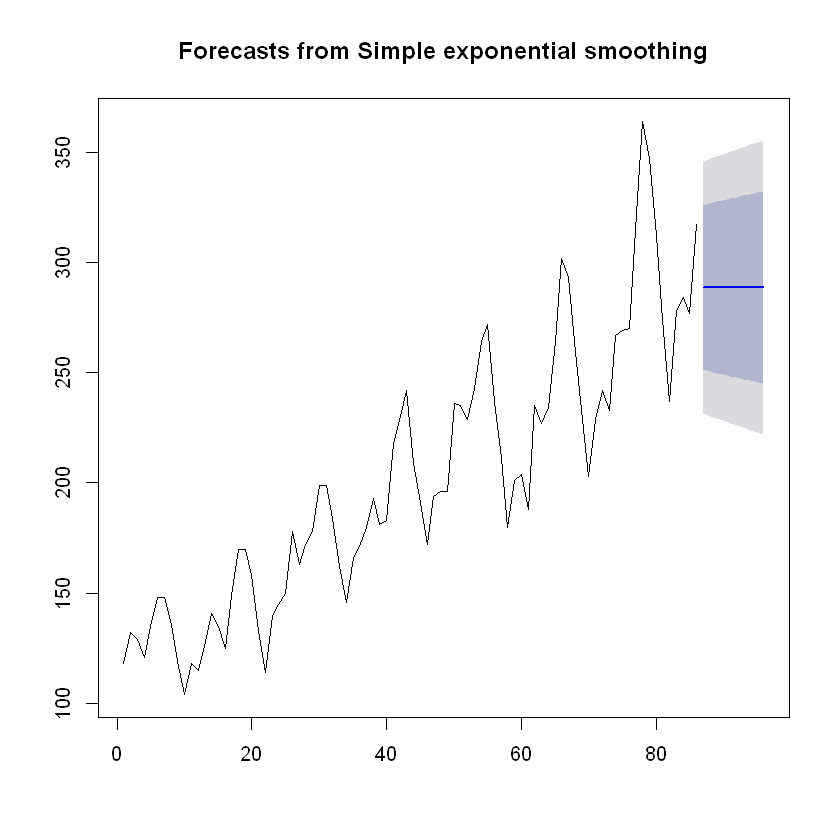

In [125]:
plot(forecast(ses_a,n.ahead=4))

In [126]:
sesa_mape<-MAPE(sesa_pred$Point.Forecast,test)*100
sesa_mape

[1] 19.18858

In [127]:
holt_ab<-holt(train,alpha = 0.2,beta = 0.1)
holt_ab

   Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
87       284.6388 236.6099 332.6678 211.18487 358.0928
88       278.8260 228.6823 328.9697 202.13778 355.5141
89       273.0131 219.3151 326.7111 190.88908 355.1371
90       267.2002 208.3770 326.0235 177.23788 357.1626
91       261.3874 195.8846 326.8901 161.20953 361.5652
92       255.5745 181.9475 329.2015 142.97173 368.1773
93       249.7616 166.7118 332.8115 122.74788 376.7754
94       243.9488 150.3231 337.5745 100.76067 387.1369
95       238.1359 132.9097 343.3621  77.20637 399.0655
96       232.3231 114.5786 350.0675  52.24847 412.3977

In [128]:
holtab_pred<-data.frame(predict(holt_ab,h=10))

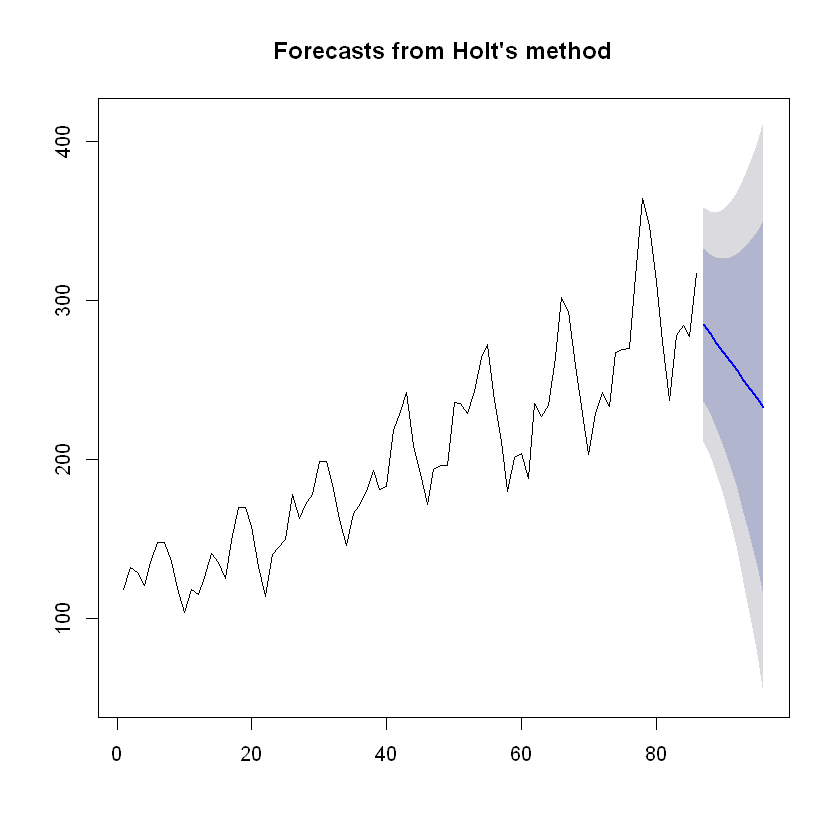

In [129]:
plot(forecast(holt_ab,h=10))

In [130]:
holtab_mape<-MAPE(holtab_pred$Point.Forecast,test)*100
holtab_mape

[1] 30.16866

In [131]:
hw_abg_new<-hw(train,alpha = 0.2,beta = 0.1,gamma = 0.1)
hw_abg_new

ERROR: Error in hw(train, alpha = 0.2, beta = 0.1, gamma = 0.1): The time series should have frequency greater than 1.


In [132]:
ses_na<-ses(train,alpha=NULL)
ses_na

   Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
87        316.996 289.1416 344.8504 274.3963 359.5957
88        316.996 277.6059 356.3861 256.7540 377.2380
89        316.996 268.7539 365.2381 243.2161 390.7759
90        316.996 261.2913 372.7007 231.8031 402.1889
91        316.996 254.7166 379.2754 221.7479 412.2441
92        316.996 248.7726 385.2194 212.6573 421.3347
93        316.996 243.3064 390.6856 204.2975 429.6945
94        316.996 238.2187 395.7733 196.5165 437.4755
95        316.996 233.4402 400.5518 189.2084 444.7836
96        316.996 228.9205 405.0715 182.2962 451.6958

In [133]:
sesna_pred<-data.frame(predict(ses_na,h = 10))
sesna_pred

,Point.Forecast,Lo.80,Hi.80,Lo.95,Hi.95
87,316.996,289.1416,344.8504,274.3963,359.5957
88,316.996,277.6059,356.3861,256.7540,377.2380
89,316.996,268.7539,365.2381,243.2161,390.7759
90,316.996,261.2913,372.7007,231.8031,402.1889
91,316.996,254.7166,379.2754,221.7479,412.2441
92,316.996,248.7726,385.2194,212.6573,421.3347
93,316.996,243.3064,390.6856,204.2975,429.6945
94,316.996,238.2187,395.7733,196.5165,437.4755
95,316.996,233.4402,400.5518,189.2084,444.7836
96,316.996,228.9205,405.0715,182.2962,451.6958


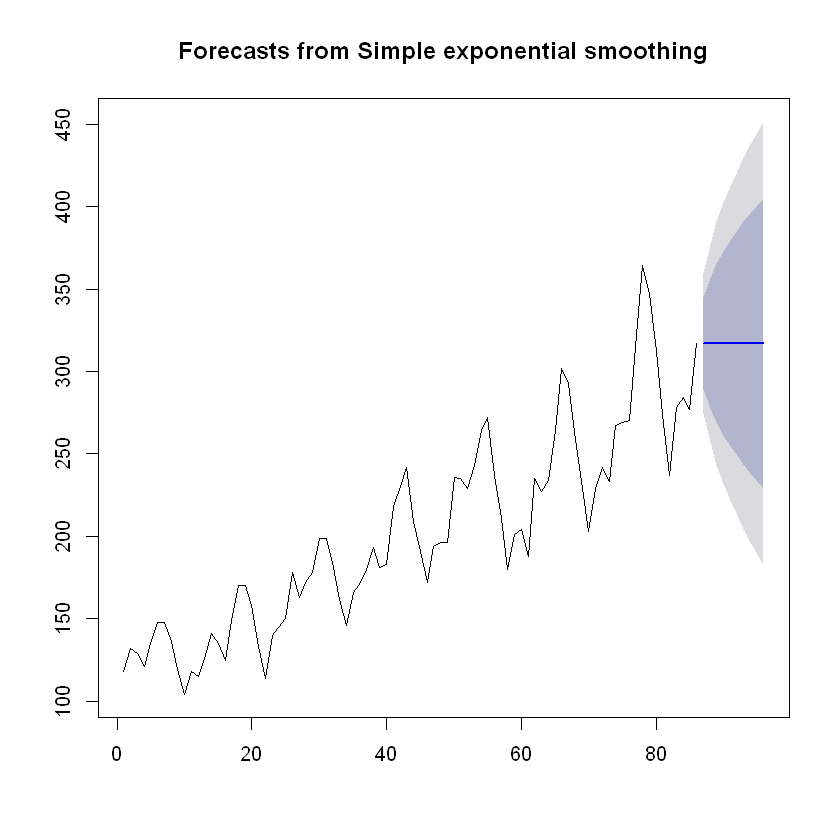

In [134]:
plot(forecast(ses_na,h=10))

In [135]:
sesna_mape<-MAPE(sesna_pred$Point.Forecast,test)*100
sesna_mape

[1] 12.33819

In [136]:
holt_nab<-holt(train,alpha = NULL,beta = NULL)
holt_nab

   Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
87       319.3945 291.3407 347.4483 276.4899 362.2991
88       321.7927 282.1187 361.4668 261.1165 382.4690
89       324.1910 275.5988 372.7832 249.8756 398.5064
90       326.5892 270.4774 382.7010 240.7736 412.4048
91       328.9875 266.2497 391.7252 233.0384 424.9366
92       331.3857 262.6568 400.1147 226.2739 436.4976
93       333.7840 259.5447 408.0233 220.2448 447.3232
94       336.1822 256.8133 415.5512 214.7979 457.5666
95       338.5805 254.3929 422.7681 209.8267 467.3343
96       340.9787 252.2329 429.7246 205.2537 476.7038

In [137]:
holtnab_pred<-data.frame(predict(holt_nab,h=10))
holtnab_pred

,Point.Forecast,Lo.80,Hi.80,Lo.95,Hi.95
87,319.3945,291.3407,347.4483,276.4899,362.2991
88,321.7927,282.1187,361.4668,261.1165,382.4690
89,324.1910,275.5988,372.7832,249.8756,398.5064
90,326.5892,270.4774,382.7010,240.7736,412.4048
91,328.9875,266.2497,391.7252,233.0384,424.9366
92,331.3857,262.6568,400.1147,226.2739,436.4976
93,333.7840,259.5447,408.0233,220.2448,447.3232
94,336.1822,256.8133,415.5512,214.7979,457.5666
95,338.5805,254.3929,422.7681,209.8267,467.3343
96,340.9787,252.2329,429.7246,205.2537,476.7038


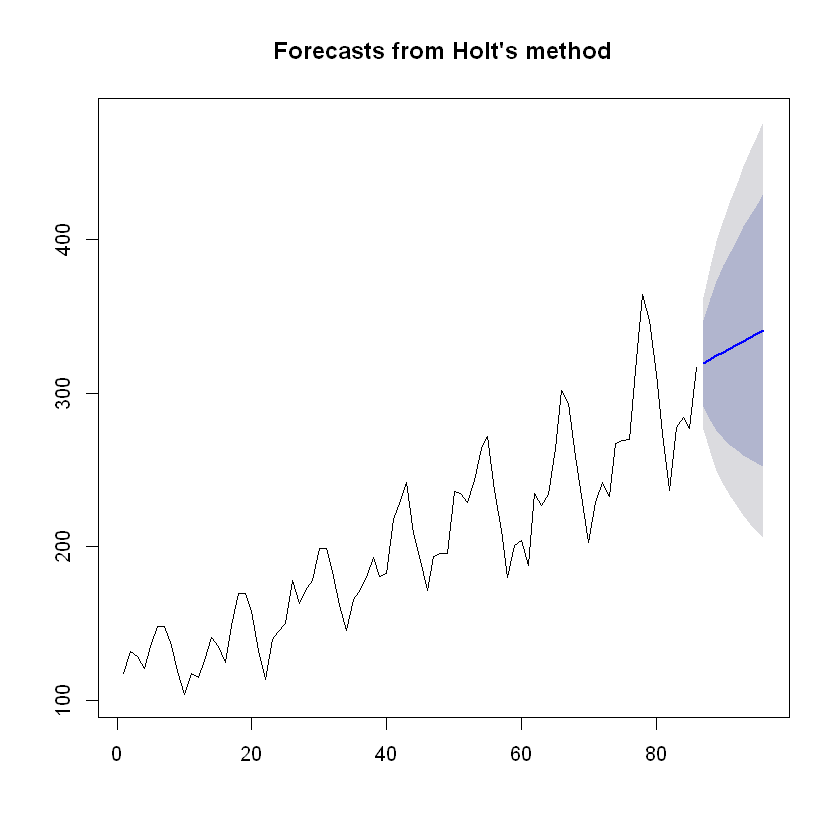

In [138]:
plot(forecast(holt_nab,h=10))

In [139]:
holtnab_mape<-MAPE(holtnab_pred$Point.Forecast,test)*100
holtnab_mape

[1] 12.50776

In [98]:
hw_nabg_new<-hw(train,alpha=NULL,beta=NULL,gamma = NULL)
hw_nabg_new

ERROR: Error in hw(train, alpha = NULL, beta = NULL, gamma = NULL): The time series should have frequency greater than 1.


In [144]:
df_mapes_new<-data.frame(c("sesa_mape","holtab_mape","sesna_mape","holtnab_mape"),c(sesa_mape,holtab_mape,sesna_mape,holtnab_mape))
colnames(df_mapes_new)<-c("MAPE","VALUE")
df_mapes_new

MAPE,VALUE
sesa_mape,19.18858
holtab_mape,30.16866
sesna_mape,12.33819
holtnab_mape,12.50776


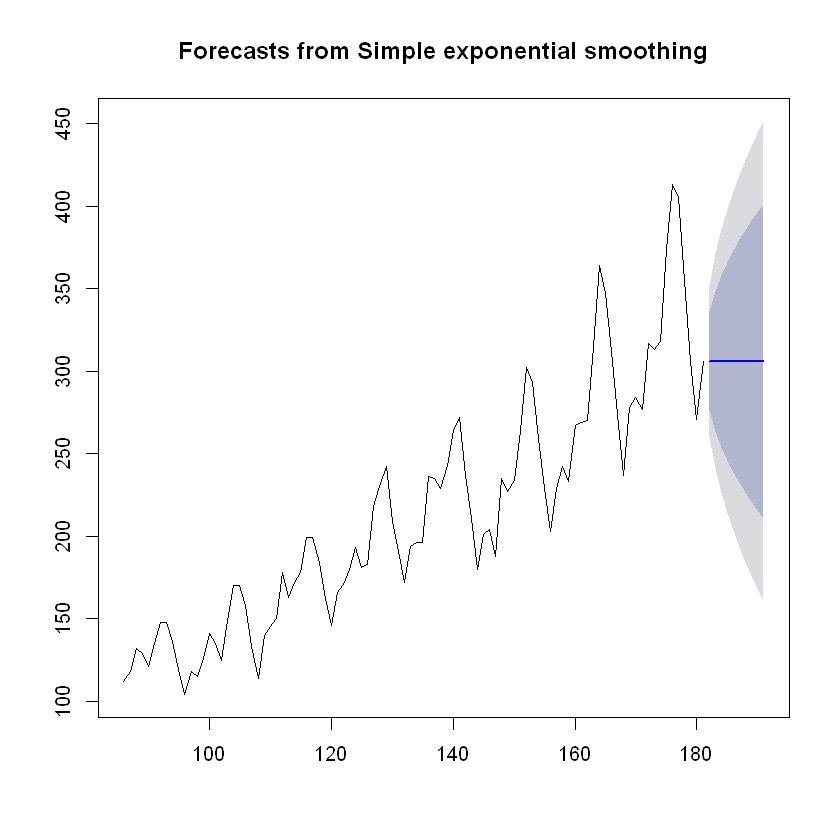

In [145]:
new_model <- ses(data_ts,alpha=NULL)
plot(forecast(new_model,h=10))

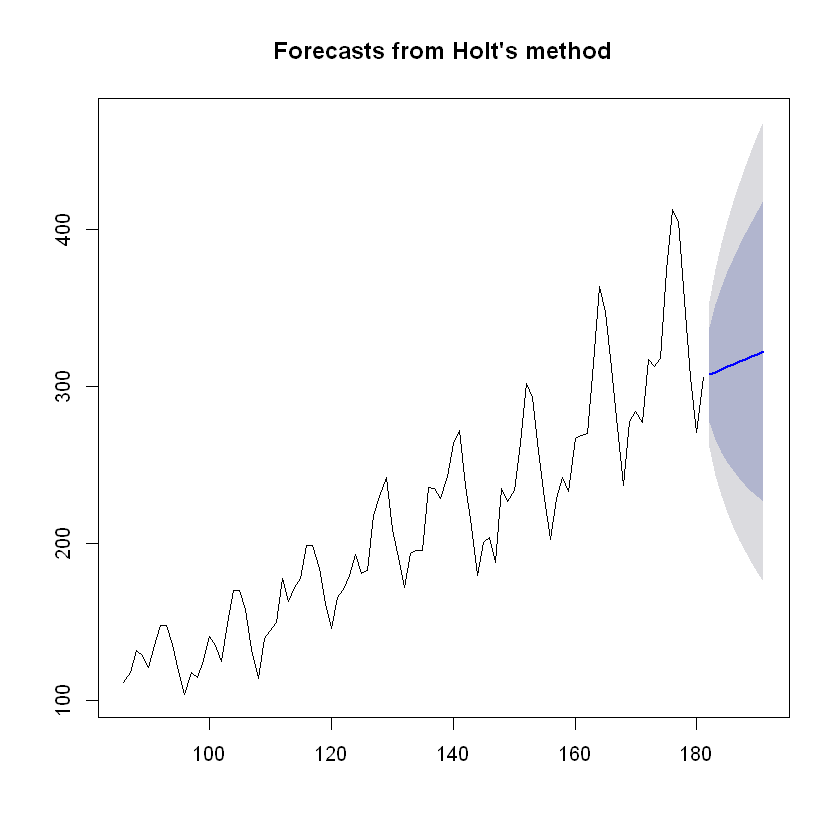

In [146]:
new_model_accurate<-holt(data_ts,alpha = NULL,beta = NULL)
plot(forecast(new_model_accurate,h=10))